<a href="https://colab.research.google.com/github/HoangCuong0811/PhanTichDuLieuPython/blob/main/07_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chiplote


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
sns.set_theme()

In [ ]:
chipo = pd.read_table('http://bit.ly/chiporders')


In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


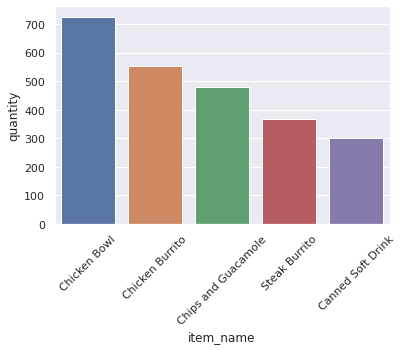

In [ ]:
data =  chipo.item_name.value_counts().head(5).to_frame()
data = data.reset_index()
data.columns = ['item_name', 'quantity']
data = sns.barplot( data = data, x = 'item_name', y = 'quantity')
data.set_xticklabels(data.get_xticklabels(), rotation = 45);

In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


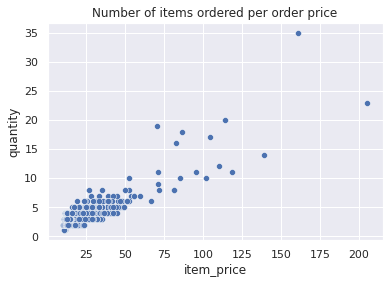

In [ ]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

orders = chipo.groupby('order_id').sum()
plt.title("Number of items ordered per order price")
sns.scatterplot(data = orders, x = 'item_price', y = 'quantity');

In [ ]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


### Online Retails Purchase

In [ ]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

In [ ]:
online_rt


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
no_uk = online_rt[online_rt.Country != 'United Kingdom']
top_10 = no_uk.groupby("Country").sum().sort_values('Quantity', ascending = False)[['Quantity']].head(10).reset_index()
top_10



,Country,Quantity
0,Netherlands,200128
1,EIRE,142637
2,Germany,117448
3,France,110480
4,Australia,83653
5,Sweden,35637
6,Switzerland,30325
7,Spain,26824
8,Japan,25218
9,Belgium,23152


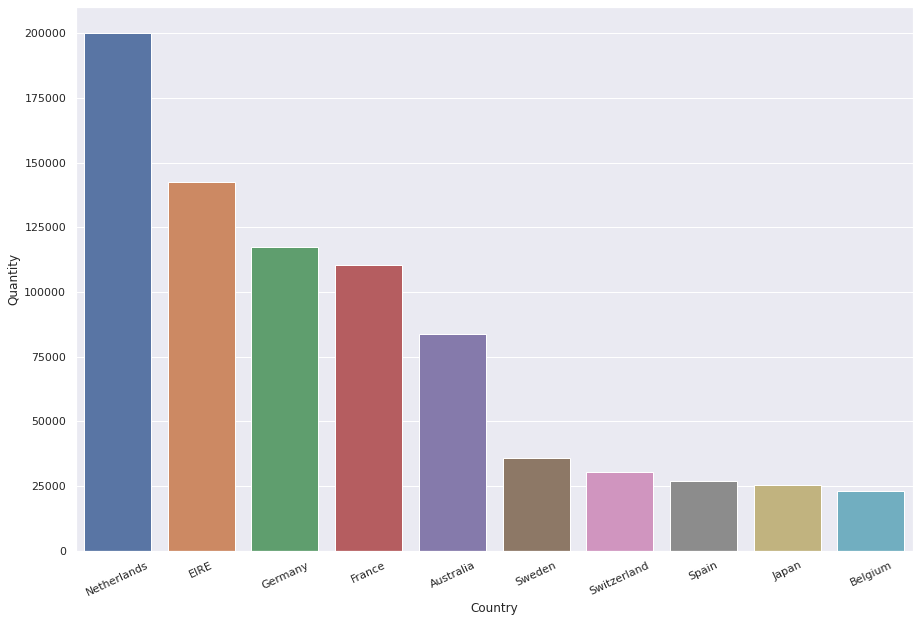

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(data = top_10, x = 'Country', y = 'Quantity')
plt.xticks(rotation = 25);

In [ ]:
non_negative = online_rt[(online_rt.Quantity > 0)].reset_index(drop=True)


In [ ]:
non_negative

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
531280,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
531281,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
531282,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
531283,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
online_rt.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


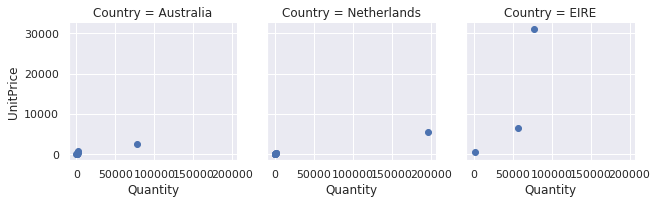

In [ ]:
customers = online_rt.groupby(['CustomerID','Country']).sum()


customers = customers[customers.UnitPrice > 0]

customers['Country'] = customers.index.get_level_values(1)

top_3_countries =  ['Netherlands', 'Australia', 'EIRE']

customers = customers[customers['Country'].isin(top_3_countries)]



g = sns.FacetGrid(customers, col = 'Country')
# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

In [ ]:
customers = online_rt.groupby(['CustomerID','Country']).sum().head()
customers


,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,0,2.08
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [ ]:
customers.UnitPrice.dtype

dtype('float64')

In [ ]:
online_rt[online_rt.CustomerID == 12347.0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland


In [ ]:
online_rt[online_rt.CustomerID == 12346].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/11 10:17,1.04,12346.0,United Kingdom


In [ ]:
online_rt.groupby('Country').Quantity.sum().sort_values(ascending = False).iloc[1:4]


Country
Netherlands    200128
EIRE           142637
Germany        117448
Name: Quantity, dtype: int64

In [ ]:
top_3 = ['Netherlands', 'EIRE', 'Germany']

In [ ]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice


In [ ]:
online_rt[online_rt.Country.isin(top_3)].groupby(["CustomerID", "Country"]).agg({'Revenue': 'mean'})

,,Revenue
CustomerID,Country,
12426.0,Germany,19.424333
12427.0,Germany,20.239143
12468.0,Germany,18.101000
12471.0,Germany,35.293635
12472.0,Germany,15.932174
...,...,...
14016.0,EIRE,26.718889
14156.0,EIRE,79.847986
14335.0,Germany,7.432698


Scores

In [ ]:
data = { 'first_name' : ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
        'age' : [42, 52, 36, 24, 73],
        'female' : [0,1,1,0,1],
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(data, columns = ['first_name', 'last_name', 'age', 'female','preTestScore', 'postTestScore'])
df


,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


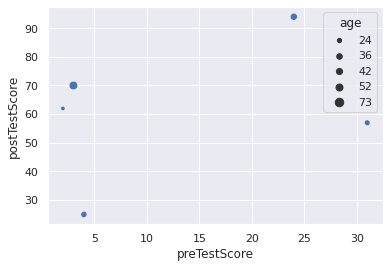

In [ ]:
sns.scatterplot(data = df, x = 'preTestScore', y = 'postTestScore', size = 'age');


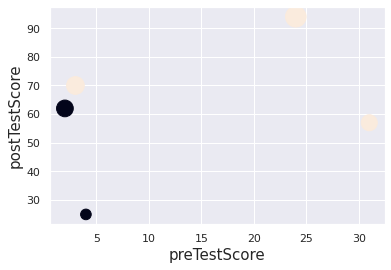

In [ ]:
plt.scatter(df.preTestScore, df.postTestScore, s = df.postTestScore * 4.5, c = df.female)

plt.xlabel("preTestScore", fontsize = 15)
plt.ylabel('postTestScore', fontsize = 15);

TIPS

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<ipython-input-32-9c449e4c8763>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  total = sns.distplot(tips.total_bill);


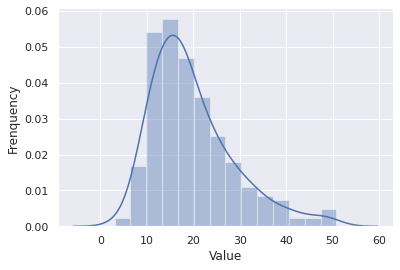

In [ ]:
total = sns.distplot(tips.total_bill);
total.set(ylabel = 'Frenquency', xlabel = 'Value')

sns.despine()



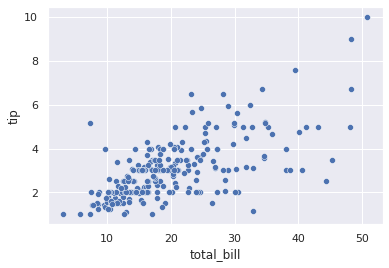

In [ ]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip' );

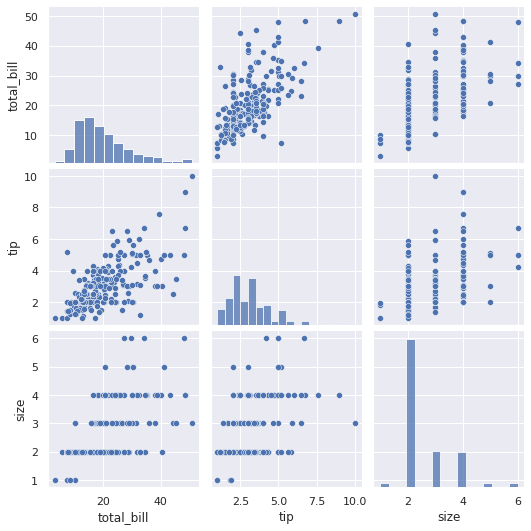

In [ ]:
sns.pairplot(tips);

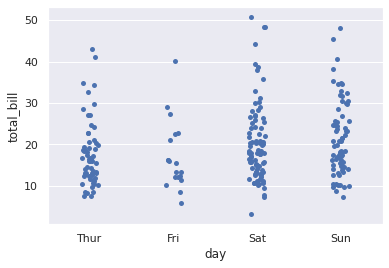

In [ ]:
sns.stripplot(data = tips, x = 'day', y = 'total_bill', jitter = True);

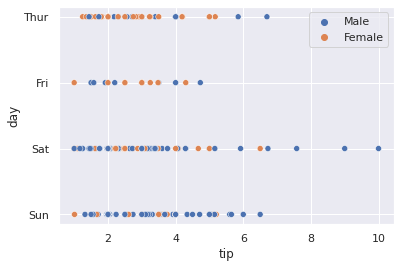

In [ ]:
sns.scatterplot(data = tips, x = 'tip', y = 'day', hue = 'sex')
plt.legend(loc = 0);

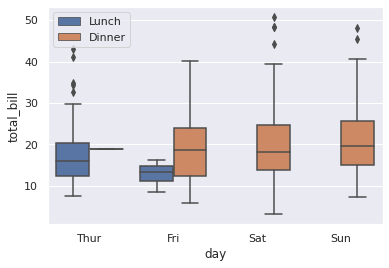

In [ ]:
sns.boxplot(data = tips, x = 'day', y = 'total_bill', hue = 'time')
plt.legend(loc = 0 );

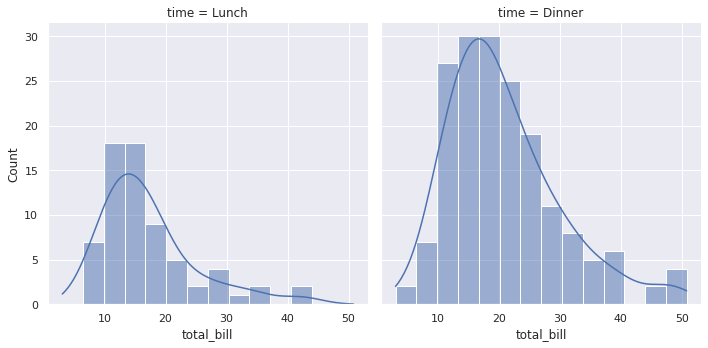

In [ ]:
sns.displot(data = tips, x = 'total_bill', col = 'time', kde = True);

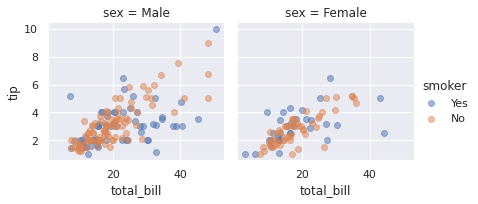

In [ ]:
g= sns.FacetGrid(tips, col = 'sex', hue = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha = 0.5 )
g.add_legend();

TITANIC DESASTER

In [ ]:
path = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/titanic_train.csv'

In [ ]:
titanic = pd.read_csv(path, sep = ',')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


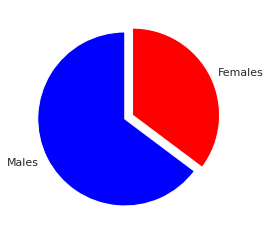

In [ ]:
males = (titanic.Sex == 'male').sum()
females = (titanic.Sex == 'female').sum()

colors = ['blue', 'red']

x = [males, females]

labels = ['Males', 'Females']
plt.pie(x, colors = colors, labels = labels, startangle = 90, explode = (0.1, 0));

In [ ]:
titanic.Survived.sum()

342

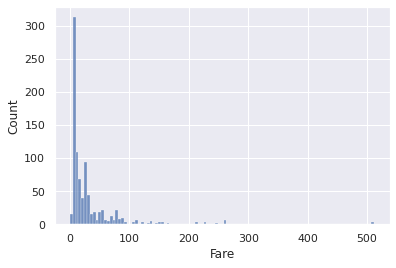

In [ ]:
sns.histplot(data = titanic, x = 'Fare');